# [L&S 88] Open Science -- Project 1, part 1

---

### Instructors Eric Van Dusen and Josh Quan

In this notebook we will be covering different approaches to Exploratory Data Analysis (EDA), exploring how different techniques and approachs can lead to different results and conclusions about data.

We will be exploring a controversial dataset which has led many data scientists down different analytical paths. This notebook contains autograder tests from [Gofer Grader](https://github.com/data-8/Gofer-Grader). Some of the tests check that you answered correctly, but some are not comprehensive. Autograder cells look like this:


```python
check('tests/q1-1.py')
```

If you pass the tests, the cell will output `All tests passed!`.

*Estimated Time: 120 minutes*

---

### Topics Covered
- Exploratory Data Analysis
- Understanding past studies with data

### Table of Contents

1 - [Introduction to Study](#section1)<br>

   
2 - [Introduction to EDA](#section2)<br>
   

3 - [More EDA and Visualizations](#section3)<br>

4 - [More Practice](#section4)<br>

5 - [Free Response](#section5)<br>

**Dependencies:**
Please consult the `datascience` library [documentation](http://data8.org/datascience/tables.html) for useful help on functions and visualizations throughout the assignment, as needed.

In [ ]:
#Just run me

# if this cell errors, uncomment the line below and rerun
# !pip install gofer-grader
from gofer.ok import check
from datascience import *
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

---

## 1. Introduction to the Study <a id='section 1'></a>

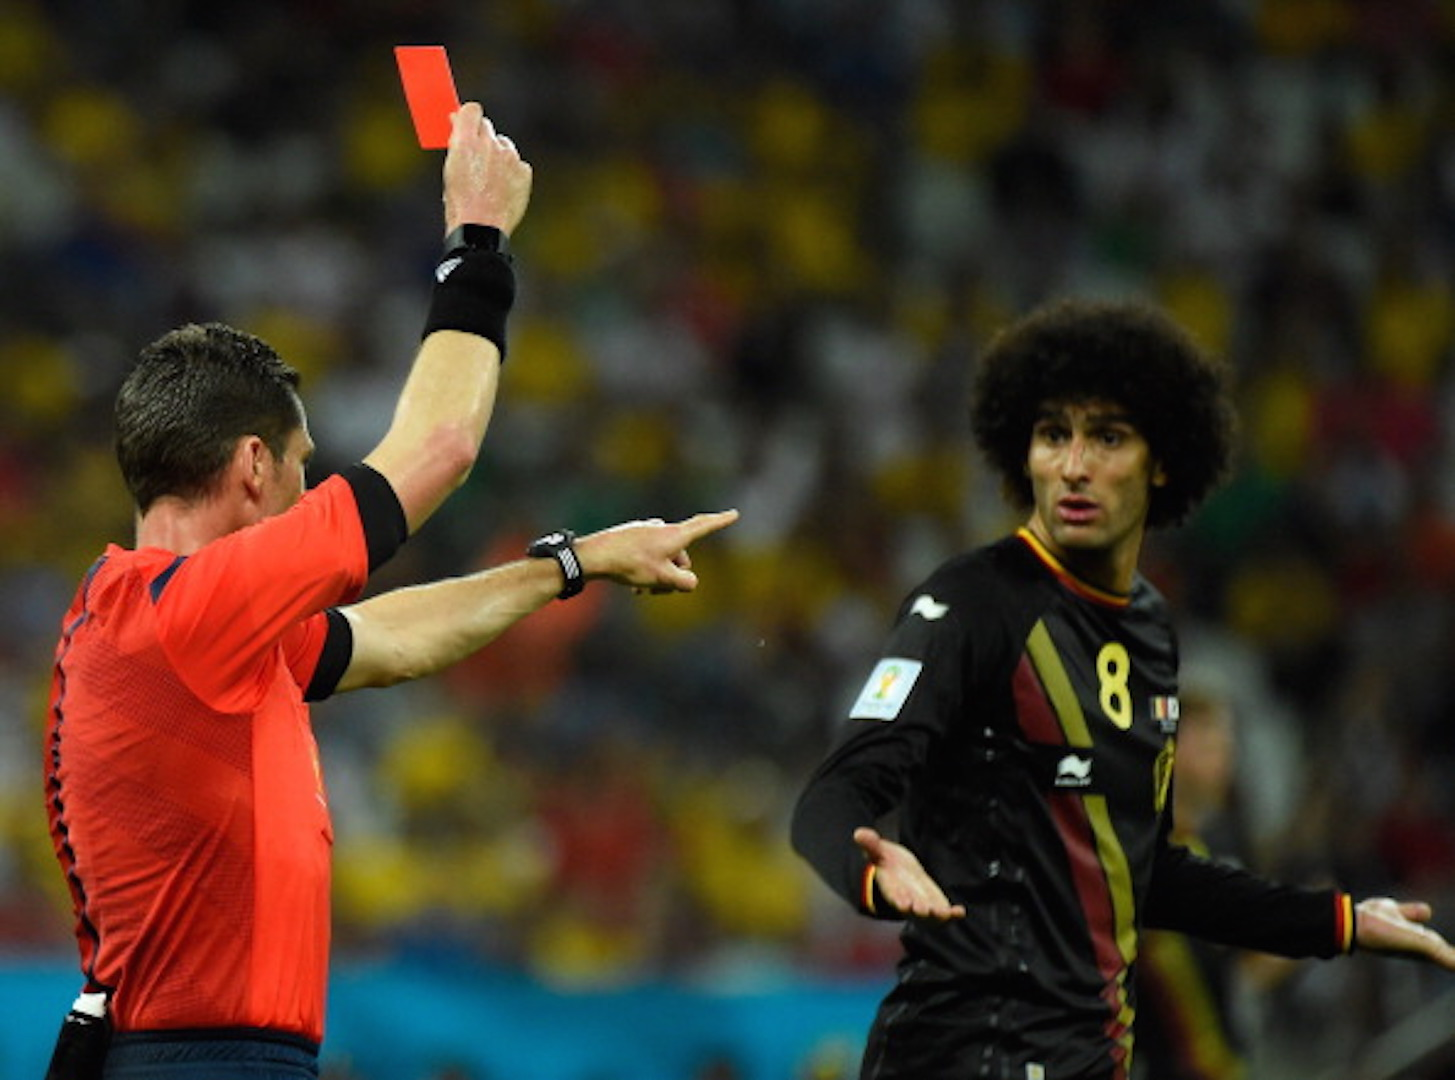
Creator: ODD Andersen

Credit: AFP/Getty Images

Nothing frustrates both soccer fans and players as much as being [red-carded](https://en.wikipedia.org/wiki/Penalty_card#Red_card). In soccer, receiving a red card from the referee means that the player awarded the red card is expelled from the game, and consequently his team must play with one fewer player for the remainder of the game.

Due to the inherently subjective nature of referees' judgments, questions involving the fairness of red card decisions crop up frequently, especially when soccer players with darker complexions are red-carded.

For the remainder of this project, we will explore a dataset on red-cards and skin color and attempt to understand how different approachs to analysis can lead to different conclusions to the general question: "Are referees more likely to give red cards to darker-skinned players?" 


---

## The Data <a id='data'></a>

In this notebook, you'll be working with a dataset containing entries for many European soccer players, containing variables such as club, position, games, and skin complexion.

Important to note about this dataset is that it was generated as the result of an [observational study](https://en.wikipedia.org/wiki/Observational_study), rather than a [randomized controlled experiment](https://en.wikipedia.org/wiki/Randomized_controlled_trial). In an observational study, entities' independent variables (such as race, height, zip code) are observed, rather than controlled as in the randomized controlled experiment. Though data scientists often prefer the control and accuracy of controlled experiments, often performing one is either too costly or poses ethical questions (e.g., testing trial drugs and placebo treatments on cancer patients at random). Though our dataset was generated organically--in the real world rather than in a laboratory--it is statistically more challenging to prove causation among variables for these kinds of observational studies (more on this in Question 2).


Please read this summary of the [dataset's description](https://osf.io/9yh4x/) to familiarize yourself with the context of the data:

*"...we obtained data and profile photos from all soccer players (N = 2053) playing in the first male divisions of England, Germany, France and Spain in the 2012-2013 season and all referees (N = 3147) that these players played under in their professional career. We created a dataset of player dyads including the number of matches players and referees encountered each other and our dependent variable, the number of red cards given to a player by a particular referee throughout all matches the two encountered each other."*

*...implicit bias scores for each referee country were calculated using a race implicit association test (IAT), with higher values corresponding to faster white | good, black | bad associations. Explicit bias scores for each referee country were calculated using a racial thermometer task, with higher values corresponding to greater feelings of warmth toward whites versus blacks."*

Run the cell below to load in the data into a `Table` object from the `datascience` library used in Data 8.

In [ ]:
# Just run me

data = pd.read_csv("CrowdstormingDataJuly1st.csv").dropna()
data = Table.from_df(data)

Here are some of the important fields in our data set that we will focus on:

|Variable Name   | Description |
|--------------|------------|
|`player` | player's name |
|`club` | player's soccer club (team) |
|`leagueCountry`| country of player club (England, Germany, France, and Spain) |
|`height` | player height (in cm) |
|`games`| number of games in the player-referee dyad |
|`position` | detailed player position |
|`goals`| goals scored by a player in the player-referee dyad |
|`yellowCards`| number of yellow cards player received from referee |
|`yellowReds`| number of yellow-red cards player received from referee |
|`redCards`| number of red cards player received from referee |
|`rater1`| skin rating of photo by rater 1 (5-point scale ranging from very light skin to very dark skin |
|`rater2`| skin rating of photo by rater 2 (5-point scale ranging from very light skin to very dark skin |
|`meanIAT`|  mean implicit bias score (using the race IAT) for referee country, higher values correspond to faster white good, black bad associations |
|`meanExp`| mean explicit bias score (using a racial thermometer task) for referee country, higher values correspond to greater feelings of warmth toward whites versus blacks |



As you can see on the table above, two of the variables we will be exploring is the ratings on skin tone (1-5) measured by two raters, Lisa and Shareef. For context, we have added a series of images that were given to them so that you can better understand their perspective on skin tones. Keep in mind that this might affect our hypothesis and drive our conclusions. 

Note: On the following images, the only two were the rating for the two raters coincide is image #3 on the top and image #6 on the bottom. 

<img src="L1S1.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="L1S2.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="L2S2.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="L3S4.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="L4S5.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="L5S5.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<p style="clear: both;">

In [ ]:
# Run this cell to peek at the data
data

<b> Question 1.1: </b> 
What is the shape of data? Save the number of variables (columns) as `num_columns` and the number of players (rows) as `num_rows`.

In [ ]:
num_columns = ...
num_rows = ...

print("Our dataset has {0} variables and {1} players.".format(num_columns, num_rows))

In [ ]:
check('tests/q1-1.py')

<b>Question 1.2:</b> Which columns should we focus our analysis on? Drop the columns which contain variables which we're not going to analyze. You might consider using the `Table.drop` method to create a transformed copy of our `data`.

In [ ]:
cols_to_drop = ["birthday", "victories", "ties", "defeats", "goals"\
                , "photoID", "Alpha_3", "nIAT", "nExp"]

data = ...

# Make sure data no longer contains those columns

data

In [ ]:
check('tests/q1-2.py')

<b> Question 1.3: </b>
Let's break down our remaining variables by type. Create a table with each of the variables' names and their classifications as either "categorical" or "quantitative" variables. In order to do this, use their Python types. *Hint*: Python's `type()` function might be helpful.

In [ ]:
python_types = []

# Get the Python type of each variable by looking at the first value in each column of the data
for ... in data:
    column_type = type(data[...].item(0))
    python_types.append(...)

label_classifications = []
numeric_categorical_vars = ["refNum", "refCountry"] # Numerical variables that aren't quantitative

# Loop through the array of variable Python types and classify them as quantitative or categorical
for ... in np.arange(len(python_types)):
    
    if python_types[...] == str: # If label is a string...
        label_classifications.append(...)
    
    elif data.labels[...] in ...: # If label is a categorical numerical variable...
        label_classifications.append(...)
    
    else: # If label isn't categorical...
        label_classifications.append(...)
        
# Create a table with the data's labels and label_classifications array
variables = Table().with_columns("variable name", data.labels\
                                 , "classification", ...)

variables.show()

In [ ]:
check('tests/q1-3.py')

<b> Question 1.4:</b> If we're trying to examine the relationship between red cards given and skin color, which variables ought we to consider? Classify the ones you choose as either independent or dependent variables and explain your choices.

Independent Variables (variables that may correlate or cause red cards):

***YOUR ANSWER HERE***

Dependent Variables (variables which indicate red cards):

***YOUR ANSWER HERE***

---

## 2. Introduction to EDA  <a id='section 2'></a>

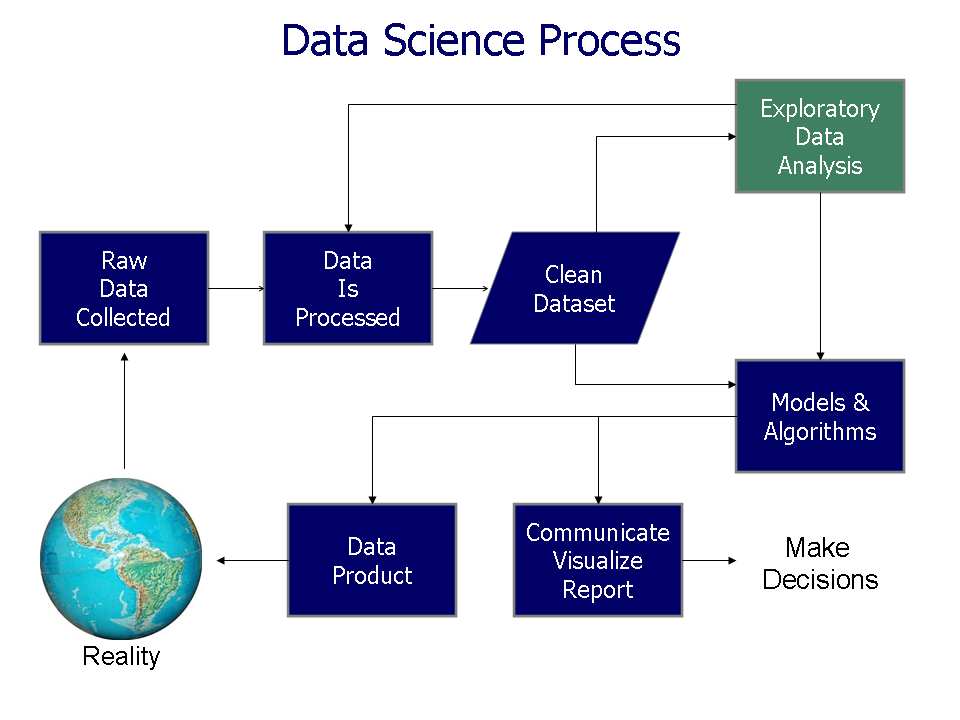
An overview of the Data Science Process with EDA highlighted. By Farcaster at English Wikipedia, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=40129394

Exploratory data analysis (EDA) is the stage of the data science process that takes the processed, cleaned dataset and attempts to learn a bit about its structure. In so doing, the data scientist ties to understand basic properties of the data. They seek to:
- Craft hypotheses about the data
- Make and assess assumptions for future statistical inference
- Select useful statistical tools and techniques
- Create explanatory of suggestive data visualizations

<b> Question 2.1: </b>
First, let's compute the minimum, maximum, mean and standard deviation of our data to understand how our data are distributed. *Hint*: look up the `Numpy` documentation for the relevant functions.

In [ ]:
stats = data.stats(ops=(min, max, ..., ...))
stats

In [ ]:
check('tests/q2-1.py')

<b> Question 2.2: </b> Now let's take our `statistics` table and enhance it a bit. First, drop the columns with categorical variables. *Hint*: Use the `variables` table we created in Question 1.3.

In [ ]:
categorical_vars = variables.where(..., ...)

cols_to_drop = categorical_vars.column(...)
stats = stats.drop(...)

stats

In [ ]:
check('tests/q2-2.py')

<b> Question 2.3: </b> Now that we have some information about the distribution of our data, let's try to get rid of some statistical outliers. Assume that data points with variables valued plus or minus 2 standard deviations (SDs) below those variables' means are statistical outliers. In other words, only data points whose variables' values are within 2 standard deviations on either side of the corresponding means are valid. Get rid of the outliers accordingly.

Formally, we can describe the set of outliers for the $i$th variable, $O_i$, as: 

$$O_i = \{\text{values} \mid \text{values} < \mu_i - 2 \sigma_i\}\cup\{\text{values} \mid \text{values} > \mu_i + 2 \sigma_i\}$$

In words, we want the "union of all values of the $i$th variable $\pm$ 2 standard deviations from the mean"

*Hint*: You'll need to look up values in your `stats` table to find the means and SDs for each variable.

In [ ]:
# Just run me to drop remaining categorical variables
data = data.drop("player", "position", "leagueCountry", "club", "playerShort", "refNum", "refCountry")

In [ ]:
for ... in data.labels:
    data = data.where(..., are.above_or_equal_to(
        stats.column(...)[...] - 2 * stats.column(...)[...]    # mean - 2 * SD
    )).where(..., are.below_or_equal_to(
        stats.column(...)[...] + 2 * stats.column(...)[...]    # mean + 2 * SD
    ))
    
data

In [ ]:
check('tests/q2-3.py')

## 3. More EDA and Visualizations <a id='section 3'></a>

##### Hypotheses: 
Two types of general hypotheses can be made about the data. Either:
##### $H_A:$ Referees give red cards to darker skinned players with higher (or lower) frequency.
or
##### $H_0:$ Referees give red cards to all players at similar frequencies.

Where $H_A$ and $H_0$ denote a "alternative" hypothesis and a ["null" hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis), respectively.


As mentioned before, we typically cannot prove causation in an observational study such as our dataset. Then we can only "reject" our null hypothesis if the our independent variable(s) and dependent variable have a statistically significant correlation, or "fail to reject" (basically, to accept the null) if there is no statistically significant correlation between the variables.

<b> Question 3.1: </b>
##### Scatter plots:
To analyze the correlation between independent and dependent variables, we may use a scatter plot as a simple form of data visualization between one numerical "x" (independent) variable and one numerical "y" (dependent) variable. Below are a few scatterplot examples a data scientist might generate when asking the questions,"How are implicit and explicit bias correlated?", and "Is a player's height correlated with the number of yellow cards he receives?", respectively.

In [ ]:
# Just run this. You don't need to understand this cell

data_df = pd.read_csv("CrowdstormingDataJuly1st.csv")
meanExp = []
meanIAT = []
for index, row in data_df.iterrows():
    if row["meanExp"] not in meanExp:
        meanExp.append(row["meanExp"])
        meanIAT.append(row["meanIAT"])
exps = np.nan_to_num(meanExp)
iats = np.nan_to_num(meanIAT)

In [ ]:
# Run to create a table of means 

means = Table().with_columns("meanExps", exps, "meanIATs", iats)
means

In [ ]:
# Run to display scatter plot meaEXPS vs meanIATS

means.select("meanIATs", "meanExps").scatter( "meanExps", fit_line=True)

What do you observe from the scatter plot? Why might these two variables be related in this way? Why might this be a coincidence?

***YOUR ANSWER HERE***

In [ ]:
# Run to display scatter plot
height_yellowCards = data.select("yellowCards", "height")
height_yellowCards.scatter("height", fit_line=True)

What do you observe from this scatter plot? Why might these two variables be related in this way? Why might this be a coincidence?

***YOUR ANSWER HERE***

<b> Question 3.2: </b> 
##### Histograms:
Histograms are a data visualization tool that helps one understand the shape of a single variable's distribution of values. Each bin in a histogram has a width such that the sum of all bin_widths * bin_heights = 1. Histograms are used to plot the empirical (observed) distribution of values. Below is an example histogram a data scientist might generate when asking the questions, "what is the empirical distribution of the `goals` variable?"

In [ ]:
# Run to display histogram of skin colors, as measure by rater 1

goals = data.select("rater1")
goals.hist("rater1", bins=np.arange(0, 1, 0.2))

In [ ]:
# Run to display histogram of skin colors, as measure by rater 2

goals = data.select("rater2")
goals.hist("rater2", bins=np.arange(0, 1, 0.2))

What do you observe from the histograms? Why could this be?

***YOUR ANSWER HERE***

<b> Question 3.3: </b>
Now create a histogram with the empirical distribution of red cards and a histogram with the empirical distribution of yellow cards. Then create a histogram that displays both simultaneously and describe your findings and offer an explanation.

In [ ]:
yellows = ...
reds = ...

yellows.hist(...)
reds.hist()

data.hist([...])

*Describe and explain your findings*

***YOUR ANSWER HERE***

<b> Question 3.4: </b>
##### Box plots:
Box plots are a data visualization that also allows a data scientist to understand the distribution of a particular variable or variables. In particular, it presents data in percentiles (25, 50, 75%) to give a more standardized picture of the spread of the data. Below is an example of box plots in a side-by-side layout describing the distribution of mean and explicit biases, respectively. Please refer to [this article](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/box-plot.htm) for more information on what the components of a box plot mean.

In [ ]:
# Run to create boxplot. We will be using the table of "means" we created in 3.1 

means.select("meanIATs", "meanExps").boxplot()

What do you observe from the box plots? Why might each distribution may be shaped like this?

***YOUR ANSWER HERE***

<b> Question 3.5: </b>
Now create a pair of side-by-side box plots analyzing the distribution of two comparable variables (i.e., red and yellow cards). Then describe your findings and offer an explanation.

In [ ]:

### Create an illustrative data visualization ###


*Describe your findings and explain why the data may be distributed this way.*

***YOUR ANSWER HERE***

---

## 4.  More Practice<a id='section 4'></a>

In [ ]:
# Just run me to reload our dropped variables into our data table

data = pd.read_csv("CrowdstormingDataJuly1st.csv").dropna()
data = Table.from_df(data)

Observe below how we're able to use a pivot table to make an insightful series of bar plots on the number of red cards awarded by referees officiating in different leagues across Europe. The number to the left of the plots' y axes represents the number of red cards awarded in those kinds of games. The labels of the plots' y axes is the number of games in that particular referee/league combination for the given number of red cards.

In [ ]:
agg = data.pivot("redCards", "leagueCountry")
agg

In [ ]:
agg.bar("leagueCountry", overlay=False)

### Question 4.1:
Interpret what you see.

*** YOUR ANSWER HERE ***

Observe below how we are again able to use a pivot table to make a similar bar plot--this time aggregating the number of games with certain amounts of red cards given by referees of different countries. Note: the referees' countries are anonimized as random, numerical IDs. 

In [ ]:
agg = data.pivot("redCards", "refCountry")
agg

In [ ]:
agg.bar("refCountry", overlay=False)

### Question 4.2:
Interpret each plot. Explain what the peaks in these bar plots represent.

***YOUR ANSWER HERE ***

Observe below the further use of pivot tables to break down the distribution of red cards by player position.

In [ ]:
agg = data.pivot("redCards", "position")
agg

In [ ]:
agg.bar("position", overlay=False, width=20)

### Question 4.3:
Interpret each plot. What [positions](https://en.wikipedia.org/wiki/Association_football_positions) stand out and why might this be?

***YOUR ANSWER HERE***

Observe a scatter plot between victories and games. Intuitively, the two variables are positively correlate and the best fit line has a slope of about 1. This slope is consistent with the fact--with the exception of ties--a win by one team must be accompanied by a loss for the opposing team.

In [ ]:
data.scatter("victories", "games", fit_line=True)

Observe a histogram of the number of games each player has appeared in the dataset.

In [ ]:
data.hist("games", bins=np.arange(1, 20))

## 5. Free Response <a id='section 5'></a>
Suppose you wish to analyze the relationship between two variables which you believe are correlated, within the context of the debate on whether skin color correlates with red cards. First, propose a null hypothesis $H_0$ about this relationship, and an alternative hypothesis $H_A$. Then create a data visualization that examines this relationship graphically, explaining why you used that visualization. Finally, describe your observations and decide whether $H_0$ or $H_A$ is more plausible based on your results.

$H_0$: ***YOUR ANSWER HERE***

$H_A$: ***YOUR ANSWER HERE***

In [ ]:

### Create an illustrative data visualization ###


*Why did you decide to use this type of visualization?*

***YOUR ANSWER HERE***

*Describe your observations and decide which hypothesis is more plausible in that context.*

***YOUR ANSWER HERE***

---
Notebook developed by: Alex McMurry

Data Science Modules: http://data.berkeley.edu/education/modules
